In [70]:
import numpy as np

import matplotlib.pyplot as plt

import os

hart_2_ev = 27.21138602

In [76]:
path = "/home/kristjan/sshfs/marconi_scratch/INDENOFLUORENES/new_gold/2xh_h_detach_neb/"

In [77]:
def read_neb_out(neb_output_log):
    distance_arr = []
    energy_arr = []

    with open(neb_output_log) as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            str_line = line.strip()
            if str_line.startswith("DISTANCES REP"):
                distances = str_line.split()[3:]
                for j in range(1, 10):
                    str_line = lines[i+j].strip()
                    if str_line.startswith("ENERGIES"):
                        break
                    distances.extend(str_line.split())
                energies = str_line.split()[3:]
                for k in range(1, 10):
                    str_line = lines[i+j+k].strip()
                    if str_line.startswith("BAND"):
                        break
                    energies.extend(str_line.split())

                distances = [0.0] + [float(x) for x in distances]
                energies = [float(x) for x in energies]

                distance_arr.append(np.array(distances))
                energy_arr.append(np.array(energies))
    return distance_arr, energy_arr

In [78]:
dist, en = read_neb_out(path+'cp2k.out')

In [79]:
len(dist)

123

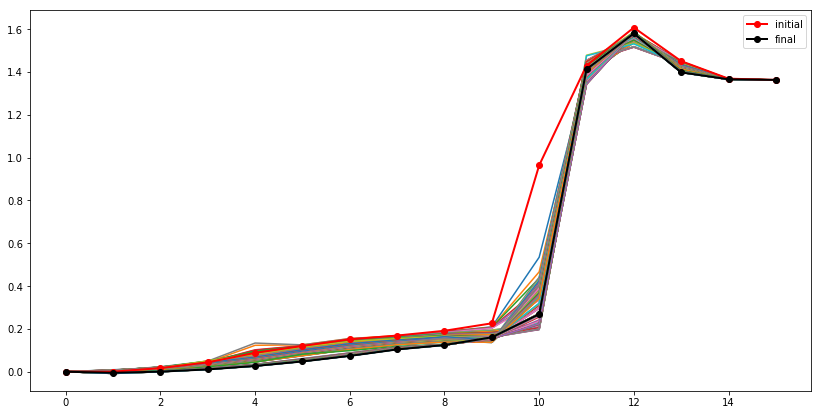

final barrier 1.58021960895


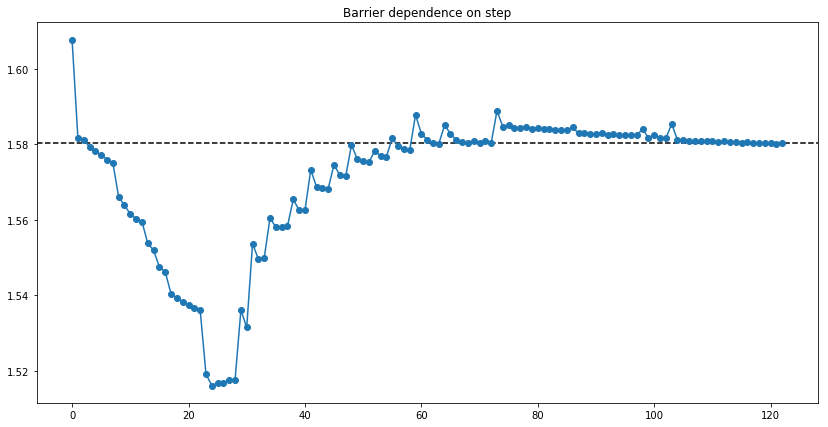

In [80]:
barrier_arr = []

plt.figure(figsize=(14, 7))

for i in range(len(dist)):
    
    en_rel = (en[i] - en[0][0])*hart_2_ev
    barrier_arr.append(np.max(en_rel))
    
    if i == len(dist)-1:
        plt.plot(en_rel, 'ko-', zorder=10, label="final", lw=2.0)
    elif i == 0:
        plt.plot(en_rel, 'ro-', zorder=5, label="initial", lw=2.0)
    else:
        plt.plot(en_rel)
    
plt.legend()
plt.show()

print("final barrier", barrier_arr[-1])

plt.figure(figsize=(14, 7))
plt.axhline(barrier_arr[-1], linestyle='--', color='k')
plt.plot(barrier_arr, 'o-')
plt.title("Barrier dependence on step")
plt.show()


In [81]:
def process_band_out(band_out_file):
       
    out_arr = []
    
    with open(band_out_file) as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            str_line = line.strip()
            if str_line.startswith("RMS DISPLACEMENT"):
                
                energy = float(lines[i-3].split()[-1])
                rms_disp = float(lines[i].split()[3])
                max_disp = float(lines[i+1].split()[3])
                rms_frce = float(lines[i+2].split()[3])
                max_frce = float(lines[i+3].split()[3])
                
                out_arr.append(np.array([energy, rms_disp, max_disp, rms_frce, max_frce]))
                
                #print("---")
                #print(energy)
                #print(rms_disp)
                #print(max_disp)
                #print(rms_frce)
                #print(max_frce)
    return np.array(out_arr)

In [43]:
band_data_arr = []

for file_str in sorted(os.listdir(path)):
    if file_str.startswith("PROJ-BAND") and file_str.endswith(".out"):
        print(file_str)
        band_data_arr.append(process_band_out(path+file_str))

PROJ-BAND01.out
PROJ-BAND02.out
PROJ-BAND03.out
PROJ-BAND04.out
PROJ-BAND05.out
PROJ-BAND06.out
PROJ-BAND07.out
PROJ-BAND08.out
PROJ-BAND09.out
PROJ-BAND10.out
PROJ-BAND11.out
PROJ-BAND12.out
PROJ-BAND13.out
PROJ-BAND14.out
PROJ-BAND15.out
PROJ-BAND16.out


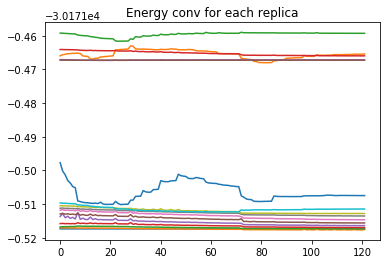

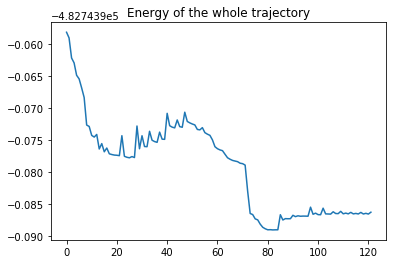

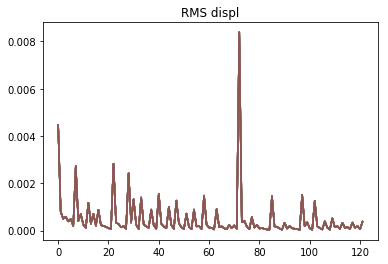

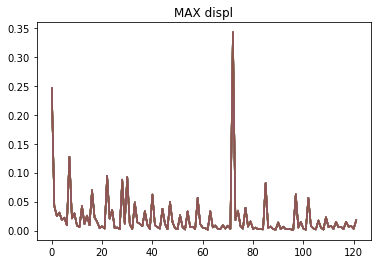

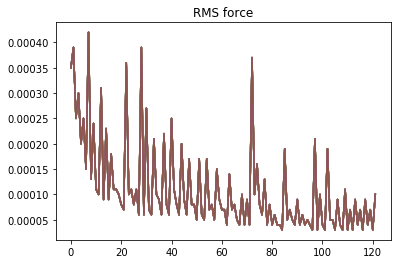

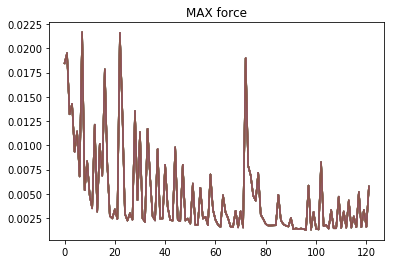

In [49]:
# plotting

# energy
for i_rep in range(len(band_data_arr)):
    plt.plot(band_data_arr[i_rep][:, 0])
plt.title("Energy conv for each replica")
plt.show()

energy_sum = np.zeros(np.shape(band_data_arr[0][:, 0]))
for i_rep in range(len(band_data_arr)):
    energy_sum += band_data_arr[i_rep][:, 0]
plt.plot(energy_sum)
plt.title("Energy of the whole trajectory")
plt.show()

for i_rep in range(len(band_data_arr)):
    plt.plot(band_data_arr[i_rep][:, 1])
plt.title("RMS displ")
plt.show()

for i_rep in range(len(band_data_arr)):
    plt.plot(band_data_arr[i_rep][:, 2])
plt.title("MAX displ")
plt.show()

for i_rep in range(len(band_data_arr)):
    plt.plot(band_data_arr[i_rep][:, 3])
plt.title("RMS force")
plt.show()
    
for i_rep in range(len(band_data_arr)):
    plt.plot(band_data_arr[i_rep][:, 4])
plt.title("MAX force")
plt.show()